In [1]:
import pyshtools as pysh
import matplotlib.pyplot as plt
import numpy as np
from pyshtools import *

from cartopy import crs as ccrs
import pygmt
from palettable import scientific as scm
from pyshtools import constants

In [2]:
pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina' 

In [3]:
clm=pysh.SHGravCoeffs.from_file('gggrx_1200a_sha.tab', format = 'shtools', lmax = 660)

In [4]:
i = 1
j = 0
for i in range(18):
    for j in range(18):
        clm.set_coeffs(0,i,j)
i =1
j = 0
for i in range(18):
    for j in range(0,-18,-1):
        clm.set_coeffs(0,i,j)

In [5]:
clm.expand()

grid = DH
nlat = 1323
nlon = 2645
n = 1322
sampling = 2
extend = True
lmax = 660
lmax_calc = 660
gm (m3 / s2) = 4.902800e+03
a (m)= 1.738000e+03
f = 0.000000e+00
omega (rad / s) = 0.0
normal gravity is removed = True
units (gravity) = 'm/s2'
units (potential) = 'm2/s2'
epoch = None

In [6]:
grid = clm.expand()

In [7]:
grid?

In [8]:
total_grid = grid.total

In [9]:
total_grid?

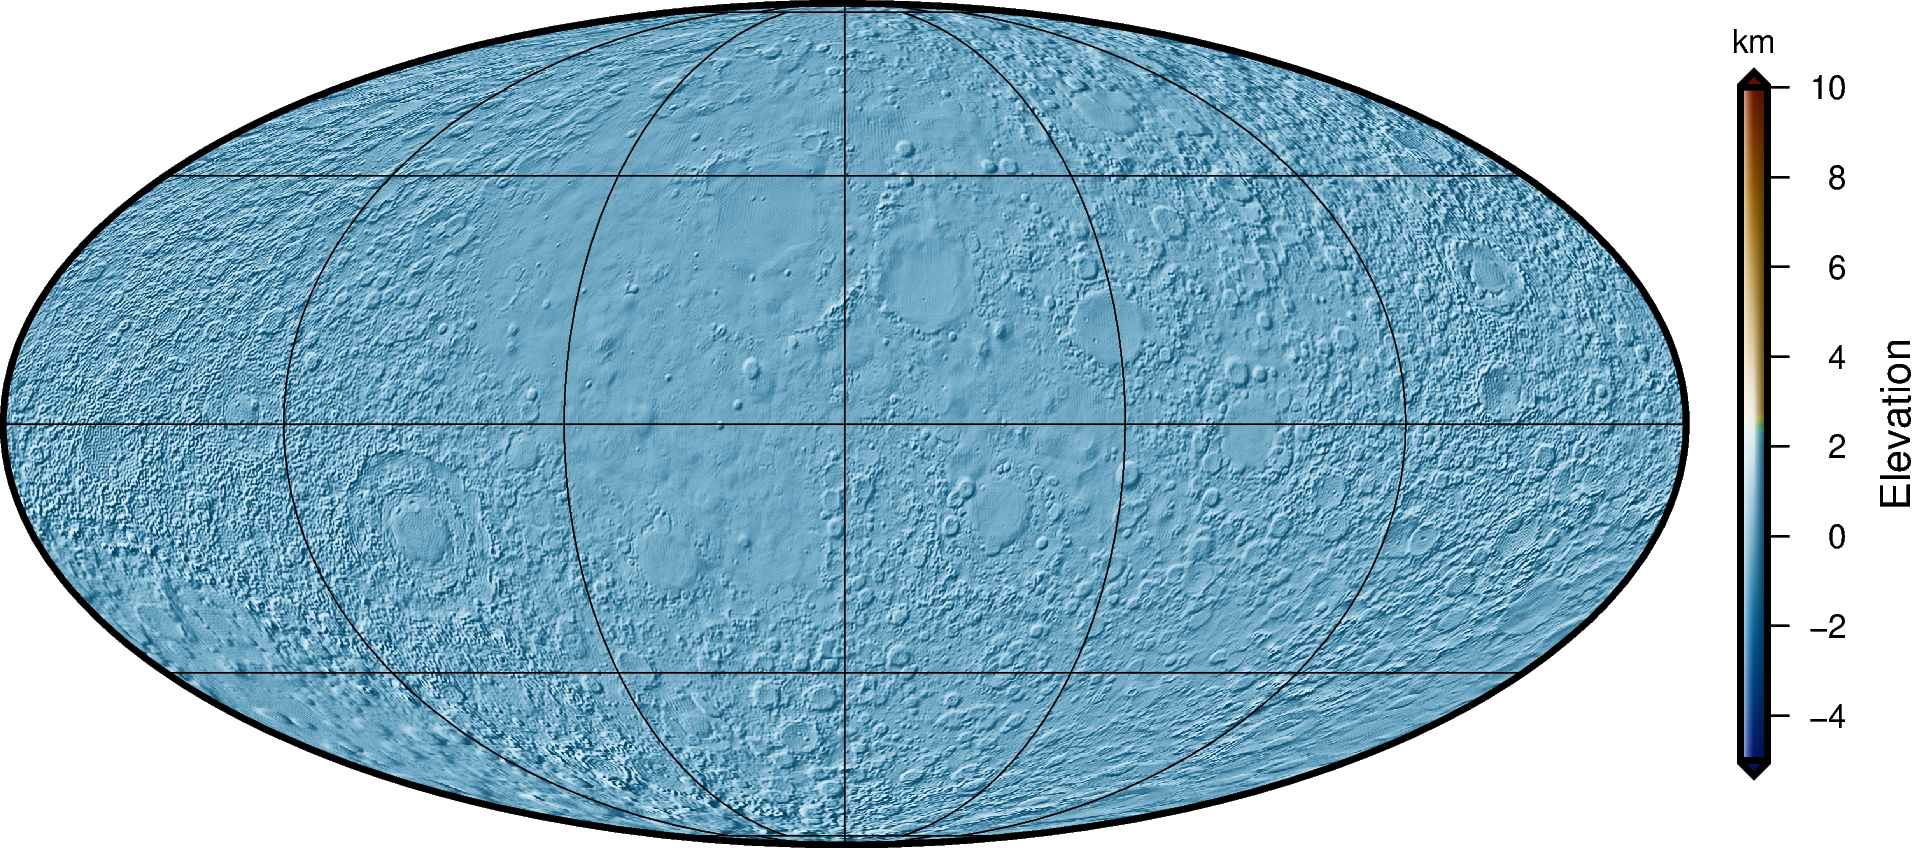

In [10]:
fig = total_grid.plotgmt(projection='mollweide',
                   central_longitude=0.,
                   cmap='vik',
                   cmap_limits=[-5, 10],
                   tick_interval=None,
                   colorbar='right',
                   cb_label='Elevation',
                   cb_ylabel='km',
                   cb_triangles='both',
                   cb_tick_interval=2,
                   grid=[60, 45],
                   shading=True)
fig.show()

In [11]:
total_array = total_grid.to_xarray()

In [12]:
#np.save('total_dis_array', total_array) #saving the geoid file as an numpy array
#np.savetxt('total_disturbance.csv', total_array, delimiter=',') #saving as CSV file

In [13]:
total_grid.info

<bound method SHGrid.info of kind = 'real'
grid = 'DH'
n = 1322
sampling = 2
nlat = 1323
nlon = 2645
lmax = 660
units = 'm/s2'
extend = True>

In [14]:
total_array?


In [15]:
print(total_grid)

kind = 'real'
grid = 'DH'
n = 1322
sampling = 2
nlat = 1323
nlon = 2645
lmax = 660
units = 'm/s2'
extend = True


In [16]:
print(total_grid.lats().size)

1323


In [17]:
print(total_grid.lons().size)

2645


In [18]:
total_array.size


3499335

In [19]:
total_array.shape


(1323, 2645)

In [20]:
total_array.ndim

2

In [21]:
#total_grid.to_file("total_raw.txt")
total_grid.to_netcdf("total_netcdf")

In [22]:
total_grid.size

AttributeError: 'DHRealGrid' object has no attribute 'size'

In [ ]:
#A = np.empty(size = total_array.size, shape = total_array.shape)
#for i in total_grid.lats():
 # #  for j in total_grid.lons():
    #    A[i][j] = total_grid.lats()[i]

R = total_grid.lats()
C = total_grid.lons()

print(len(R))
print(len(C))

for i in range(len(R)-1):
    print(R[i])

        

In [ ]:
for j in range(len(C)-1):
    print(C[j])


In [ ]:
with open("lats.csv","w") as file1:
    lat = total_grid.lats()
    
    for i in lat:
        file1.write(str(i))
        file1.write("\n")

In [ ]:
with open("lons.csv","w") as file1:
    lat = total_grid.lons()
    
    for i in lat:
        file1.write(str(i))
        file1.write("\n")

In [ ]:
for m in total_array:
    for k in m:
        print("**********************")
        print(k, end=" ")
        
        print("XXXXXXX")
        
        

In [24]:
print(total_array[0,0])

<xarray.DataArray ()>
array(1.00206536e-06)
Coordinates:
    lat      float64 90.0
    lon      float64 0.0
Attributes:
    actual_range:  [3.6130876901320137e-09, 1.7816905452799317e-05]
    comment:       pyshtools grid
    nlat:          1323
    nlon:          2645
    lmax:          660
    kind:          real
    grid:          DH
    extend:        True
    sampling:      2
    units:         m/s2


In [25]:
num_arr = total_grid.to_array()

In [26]:
print(num_arr[0,0])

1.0020653582417631e-06


In [27]:
print(num_arr[0,:])

[1.00206536e-06 1.00206536e-06 1.00206536e-06 ... 1.00206536e-06
 1.00206536e-06 1.00206536e-06]


In [28]:
print(num_arr)

[[1.00206536e-06 1.00206536e-06 1.00206536e-06 ... 1.00206536e-06
  1.00206536e-06 1.00206536e-06]
 [1.14660005e-06 1.14634719e-06 1.14609351e-06 ... 1.14710332e-06
  1.14685210e-06 1.14660005e-06]
 [1.04746903e-06 1.04702039e-06 1.04656972e-06 ... 1.04836023e-06
  1.04791565e-06 1.04746903e-06]
 ...
 [1.73600780e-06 1.73678956e-06 1.73757226e-06 ... 1.73444717e-06
  1.73522700e-06 1.73600780e-06]
 [1.78842905e-06 1.78815336e-06 1.78787628e-06 ... 1.78897626e-06
  1.78870334e-06 1.78842905e-06]
 [1.46417288e-06 1.46417288e-06 1.46417288e-06 ... 1.46417288e-06
  1.46417288e-06 1.46417288e-06]]


In [30]:
num_arr.size


3499335

In [31]:
num_arr.shape


(1323, 2645)

In [32]:
len(num_arr)


1323

In [34]:
num_arr.ndim

2

In [ ]:
for i in num_arr:
    for j in i:
        print(i,j)
        print('\n')